In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
baskets = pd.read_csv("data/company_basket.csv", sep=";")
baskets

,basket_name,company_name,company_share
0,a123456789b123456789c123456789,Gaming Realms PLC,22.474253
1,a123456789b123456789c123456789,Intercede Group PLC,15.830177
2,a123456789b123456789c123456789,Jujubee SA,0.612906
3,a123456789b123456789c123456789,Net Insight AB,33.207190
4,a123456789b123456789c123456789,Osmozis SA,16.675088
...,...,...,...
3278,WTF II,Capitea SA,1.243451
3279,WTF II,Dolphin Drilling AS,55.178652
3280,WTF II,Energy Solar Tech SA,4.256468
3281,WTF II,Kibo Energy PLC,0.709684


In [3]:
stock_files = [
    "Sweden_20220701.txt",
    "Sweden_20230601.txt",
    "Sweden_20240601.txt",
    "Sweden_20211201.txt",
    "Sweden_20221101.txt",
    "Sweden_20231001.txt",
    "Sweden_20241001.txt",
    "Sweden_20220301.txt",
    "Sweden_20230301.txt",
    "Sweden_20240201.txt"
]

stock_dfs = []
for file in stock_files:
    stock_info = pd.read_csv(f"data/{file}", sep=";", parse_dates=["endtime"])
    stock_dfs.append(stock_info)
stocks = pd.concat(stock_dfs)

In [4]:
stocks["finparametername"].value_counts()

finparametername
Mcap            1525849
TRV             1054890
closingPrice    1038874
Ebitda           934553
Revenue          890741
Name: count, dtype: int64

In [5]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5444907 entries, 0 to 706323
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   country_name          object        
 1   industry_name         object        
 2   economic_sector_name  object        
 3   company_name          object        
 4   finparametername      object        
 5   endtime               datetime64[ns]
 6   finval                float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 332.3+ MB


In [6]:
stocks["industry_name"].value_counts()

industry_name
Software                                        456937
Biotechnology & Medical Research                395688
Real Estate Rental, Development & Operations    391379
Advanced Medical Equipment & Technology         256605
IT Services & Consulting                        213484
                                                 ...  
Agricultural Chemicals                            4669
Multiline Insurance & Brokers                     4567
Water & Related Utilities                         3888
Oil Related Services and Equipment                3761
Schools, Colleges & Universities                  3677
Name: count, Length: 111, dtype: int64

In [7]:
stocks["economic_sector_name"].value_counts()

economic_sector_name
Technology                         1284810
Healthcare                         1089347
Industrials                         937244
Consumer Cyclicals                  646259
Real Estate                         415081
Financials                          377118
Basic Materials                     250085
Consumer Non-Cyclicals              239284
Energy                              139266
Utilities                            40078
Academic & Educational Services      26335
Name: count, dtype: int64

In [8]:
stocks["country_name"].value_counts()

country_name
Sweden    5444907
Name: count, dtype: int64

In [9]:
stocks_sorted = stocks.sort_values(by=['endtime'], ascending=False)
stocks_sorted

,country_name,industry_name,economic_sector_name,company_name,finparametername,endtime,finval
262686,Sweden,Communications & Networking,Technology,Clavister Holding AB,TRV,2024-08-07,0.000000e+00
66554,Sweden,Industrial Machinery & Equipment,Industrials,Trelleborg AB,closingPrice,2024-08-07,3.580660e+01
50574,Sweden,Construction & Engineering,Industrials,Instalco AB,Ebitda,2024-08-07,1.416509e+08
422447,Sweden,Online Services,Technology,Hemnet Group AB (publ),closingPrice,2024-08-07,3.565399e+01
422446,Sweden,Online Services,Technology,Hemnet Group AB (publ),Revenue,2024-08-07,9.980133e+07
...,...,...,...,...,...,...,...
31453,Sweden,Electrical Components & Equipment,Industrials,Ecoclime Group AB,closingPrice,2021-08-31,2.024653e+00
31454,Sweden,Electrical Components & Equipment,Industrials,Ecoclime Group AB,Ebitda,2021-08-31,1.598822e+06
31455,Sweden,Electrical Components & Equipment,Industrials,Ecoclime Group AB,Revenue,2021-08-31,1.700601e+07
31456,Sweden,Electrical Components & Equipment,Industrials,Ecoclime Group AB,Mcap,2021-08-31,8.149111e+07


In [10]:
closing_price_stocks = stocks_sorted[["company_name", "finparametername", "endtime", "finval"]].loc[stocks_sorted["finparametername"] == "closingPrice"]
closing_price_stocks

,company_name,finparametername,endtime,finval
66554,Trelleborg AB,closingPrice,2024-08-07,35.806602
422447,Hemnet Group AB (publ),closingPrice,2024-08-07,35.653990
364127,Trainimal AB,closingPrice,2024-08-07,0.047405
81646,Duroc AB,closingPrice,2024-08-07,1.639671
146358,TF Bank AB,closingPrice,2024-08-07,22.414895
...,...,...,...,...
382497,Idun Industrier AB (publ),closingPrice,2021-08-31,37.107042
199087,Alteco Medical AB,closingPrice,2021-08-31,0.115728
337842,Trainimal AB,closingPrice,2021-08-31,2.006099
31453,Ecoclime Group AB,closingPrice,2021-08-31,2.024653


<Axes: xlabel='endtime'>

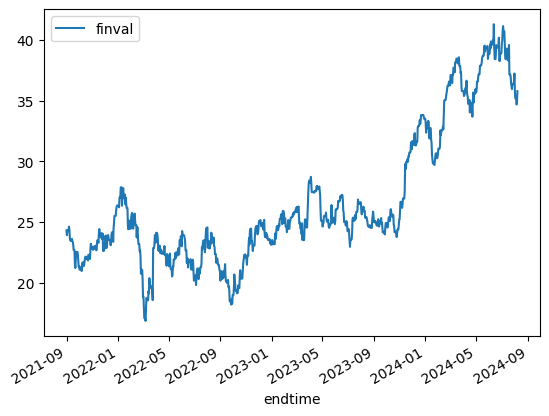

In [15]:
closing_price_stocks.loc[closing_price_stocks["company_name"] == "Trelleborg AB"][["endtime", "finval"]].plot(x="endtime")